# Logistic Regression using Tensorflow

_Xem thêm bài viết gốc tại GeeksforGeeks:_

https://www.geeksforgeeks.org/ml-logistic-regression-using-tensorflow/

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
#load dataset
data = pd.read_csv('data/dataset.csv', header=None)
print(data.shape)
print(data.head(5))

(100, 4)
   0    1    2  3
0  0  5.1  3.5  1
1  1  4.9  3.0  1
2  2  4.7  3.2  1
3  3  4.6  3.1  1
4  4  5.0  3.6  1


In [3]:
#feature matrix
x_orig = data.iloc[:, 1:-1].values
print(x_orig.shape)
print(x_orig[:5])

#data labels
y_orig = data.iloc[:, -1:].values
print(y_orig.shape)
print(y_orig[:5])


(100, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
(100, 1)
[[1]
 [1]
 [1]
 [1]
 [1]]


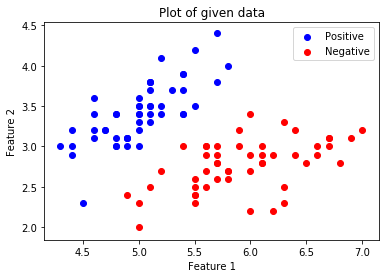

In [4]:
#positive data points
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) if y_orig[i] ==1])

#negative data points
x_neg = np.array([x_orig[i] for i in range(len(x_orig)) if y_orig[i] == 0])

#plotting the Positive data points
plt.scatter(x_pos[:, 0], x_pos[:, 1], c='b', label = 'Positive')
plt.scatter(x_neg[:, 0], x_neg[:, 1], c='r', label = 'Negative')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of given data')
plt.legend()

plt.show()

In [5]:
#Create the One Hot Encoder
oneHot = OneHotEncoder()

#Encoding x_orig
oneHot.fit(x_orig)
x = oneHot.transform(x_orig).toarray()

#Encoding y_orig
oneHot.fit(y_orig)
y = oneHot.transform(y_orig).toarray()

C:\Users\Thinkpad T470s\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Thinkpad T470s\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto

In [6]:
alpha, epochs =0.0035, 500
m, n = x.shape

print(m,n)
print('Learning rate = ', alpha)
print('Number of Epochs = ', epochs)

100 7
Learning rate =  0.0035
Number of Epochs =  500


In [7]:
#using tensorflow 
#There are n cloumns in the feature matrix
#after one hot encoder
X = tf.placeholder(tf.float32, [None, n])

#Since this is a binary classification problem, 
#Y can take only 2 values
Y = tf.placeholder(tf.float32, [None, 2])

#trainable variable weights
W = tf.Variable(tf.zeros([n, 2]))

#trainable variable bias
b = tf.Variable(tf.zeros([2]))

In [8]:
#hypothesis
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))

#sigmoid cross entropy cost function
cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = Y_hat, labels = Y)

#gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=alpha).minimize(cost)

#global variables initializerl
init = tf.global_variables_initializer()

W0907 23:04:27.751807 14820 deprecation.py:323] From C:\Users\Thinkpad T470s\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
#Starting the Tensorflow Session
with tf.Session() as sess:
    
    #initializing the variables
    sess.run(init)
    
    #lists for storing the changing Cost and Accuracy in every Epoch
    cost_history, accuracy_history = [], []
    
    #iterating through all the epochs
    for epoch in range(epochs):
        cost_per_epoch = 0
        
        #running the optimizer
        sess.run(optimizer, feed_dict = {X: x, Y: y})
        
        #calculating cost on current epoch
        c = sess.run(cost, feed_dict = {X: x, Y: y})
        
        #calculating accuracy on current epoch
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), tf.argmax(Y,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
        #storing cost and accuracy to the history
        cost_history.append(sum(sum(c)))
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100)
        
        #Displaying result on curent epoch
        if epoch % 100 == 0 and epoch != 0:
            print('Epoch '+str(epoch) + '\tCost = ' +str(cost_history[-1]))
    
    Weight = sess.run(W) #Optimizer Weight
    Bias = sess.run(b)   #Optimizer Bias
    
    #Final Accuracy
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    print('\nAccuracy = ', accuracy_history[-1], '%')

Epoch 100	Cost = 125.70020294189453
Epoch 200	Cost = 120.6471176147461
Epoch 300	Cost = 118.15159225463867
Epoch 400	Cost = 116.54999923706055

Accuracy =  91.00000262260437 %


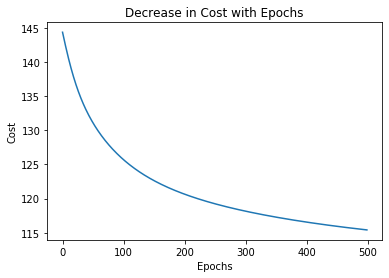

In [10]:
#plotting the change of cost over the epochs
plt.plot(list(range(epochs)), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Decrease in Cost with Epochs')

plt.show()

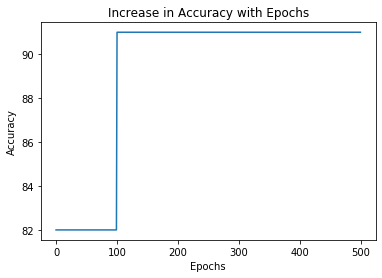

In [11]:
#plotting the change of accuracy over the epochs
plt.plot(list(range(epochs)), accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Increase in Accuracy with Epochs')

plt.show()

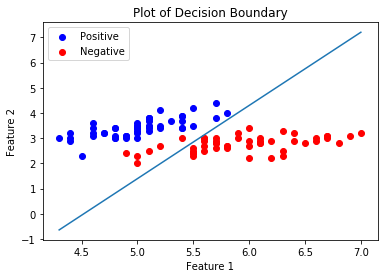

In [12]:
#Plotting the Decision Boundary
decision_boundary_x = np.array([np.min(x_orig[:, 0]), np.max(x_orig[:, 0])])
decision_boundary_y = (-1. / Weight[0])*(decision_boundary_x * Weight + Bias)
decision_boundary_y = [sum(decision_boundary_y[:, 0]), sum(decision_boundary_y[:, 1])]

#Positive data points
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) if y_orig[i] == 1])

#Negative data points
x_neg = np.array([x_orig[i] for i in range(len(x_orig)) if y_orig[i] == 0])

#Plotting the positive data point
plt.scatter(x_pos[:, 0], x_pos[:, 1], c='b', label ='Positive')

#Plotting the negative data point
plt.scatter(x_neg[:, 0], x_neg[:, 1], c='r', label ='Negative')

#plotting the Decision Boundary
plt.plot(decision_boundary_x, decision_boundary_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of Decision Boundary')
plt.legend()

plt.show()